## Observations and Insights 

Observations:
1. Based on the bar charts for both Pandas and Matplotlib, the Capomulin and Ramicane drug regimens had the greatest number of measurements 
2. You can also make the assumption that both Ceftamin and Infubinol are similar in tumor volume based on that they have very similar median tumor volumes
3. There was a greater distribution of male mice as opposed to female mice, but only by less than a 2% margin


In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())


249

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df = merge_df[merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
print(duplicate_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 



In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:

# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

249


## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_statistics_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_statistics_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_statistics_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_statistics_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_statistics_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()



In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table = pd.DataFrame({"Tumor Volume Mean": summary_statistics_mean, "Tumor Volume Median":summary_statistics_median, "Tumor Volume Variance": summary_statistics_var, 
                            "Tumor Volume Standard Deviation":summary_statistics_std, " Tumor Volume SEM": summary_statistics_sem })
summary_table


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
#Using the aggregation method, produce the same summary statistics in a single line

agg_df = clean_df["Tumor Volume (mm3)"]
agg_df.agg(['mean', 'median','std','var','sem'])                            

mean      50.449276
median    48.951421
std        8.904565
var       79.291277
sem        0.204933
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

In [69]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurement = clean_df.groupby("Drug Regimen")["Drug Regimen"].count()
measurements_chart = pd.DataFrame(measurement)

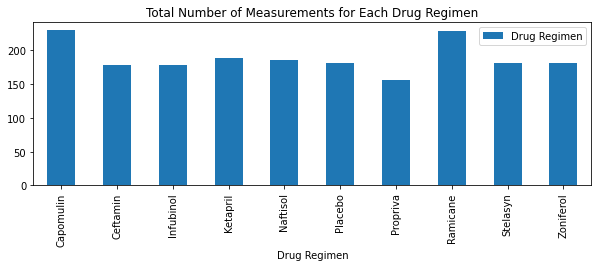

In [46]:
measurements_chart.plot(kind="bar", figsize=(10,3))


# Set a title for the chart
plt.title("Total Number of Measurements for Each Drug Regimen")
plt.show()


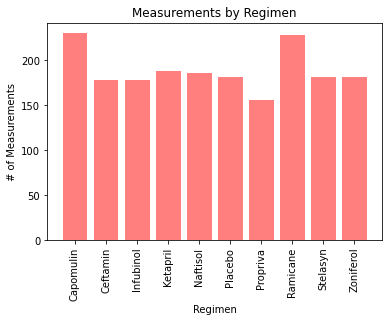

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#drug_regimens = ["Capomulin", "Ceftamin","Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva" "Ramicane", 
                # "Stelasyn", "Zoniferol"]
#drug_count = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
#plt.bar(drug_regimens, drug_count, align="center", alpha=0.5)

#y_axis = [230,178,178,188,186,181,156,228,181,182]

drug_regimen = ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril', 'Naftisol', 'Placebo', 'Propriva','Ramicane','Stelasyn','Zoniferol']
drug_count = [230,178,178,188,186,181,156,228,181,182]
plt.bar(drug_regimen, drug_count, color="r", align='center', alpha=0.5)
plt.ylabel('# of Measurements')
plt.xlabel('Regimen')
plt.title('Measurements by Regimen')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:ylabel='Sex'>

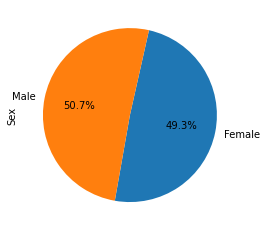

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby("Sex")["Sex"].count()
ax = plt.subplot(111)
gender.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=260, fontsize=10)

([<matplotlib.patches.Wedge at 0x7ff5d72ac8b0>,
 [Text(-0.6872462450269542, -0.8588903298421469, 'Males'),
  Text(0.6872463254420675, 0.8588902654975058, 'Females')],
 [Text(-0.37486158819652043, -0.46848563445935276, '50.7%'),
  Text(0.3748616320593095, 0.46848559936227585, '49.3%')])

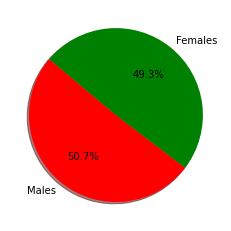

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Males", "Females"]

# The values of each section of the pie chart
sizes = [958, 930]

# The colors of each section of the pie chart
colors = ["red", "green",]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list=['Capomulin','Ramicane','Infubinol','Ceftamin']
new_table = clean_df.loc[clean_df['Drug Regimen'].isin(treatment_list)]

# Start by getting the last (greatest) timepoint for each mouse

new_table = pd.DataFrame(new_table.groupby("Mouse ID")["Timepoint"].max())

new_table_merge = pd.merge(new_table, clean_df, on='Mouse ID', how='left')
max_timepoint = new_table_merge.loc[new_table_merge['Timepoint_x'] == new_table_merge['Timepoint_y']].reset_index()
dropped_max = max_timepoint.drop(columns=['Timepoint_y'])
dropped_max

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,index,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,9,a203,45,Infubinol,Female,20,23,67.973419,2
1,19,a251,45,Infubinol,Female,21,25,65.525743,1
2,29,a275,45,Ceftamin,Female,20,28,62.999356,3
3,39,a411,45,Ramicane,Male,3,22,38.407618,1
4,49,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...,...
95,773,y769,45,Ceftamin,Female,6,27,68.594745,4
96,783,y793,45,Capomulin,Male,17,17,31.896238,2
97,793,y865,45,Ceftamin,Male,23,26,64.729837,3
98,803,z578,45,Ramicane,Male,11,16,30.638696,0


In [74]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
for drug in treatment_list:
    
    #drug = treatment_list[0]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = dropped_max.loc[dropped_max["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
     # add subset 
    tumor_volume_data.append(tumor_volume)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print("\n==========================")
    print(drug)
    print("==========================\n")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volumes is: {iqr}")
    print(f"The the median of tumor volumes is: {quartiles[0.5]} ")
     # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    
    
    
   
    
    
   
    


Capomulin

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
The the median of tumor volumes is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane

The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volumes is: 9.098536719999998
The the median of tumor volumes is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volumes is: 11.477135160000003
The the median of tumor volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin

The lower quarti

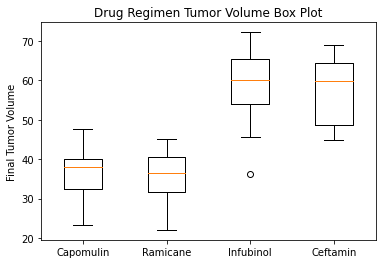

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen Tumor Volume Box Plot')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumor_volume_data, labels=treatment_list)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume Vs Timepoint')

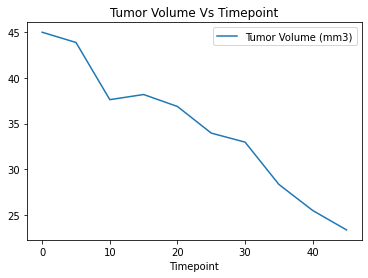

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"]=="s185"]
lines = capomulin_mouse.plot.line(x="Timepoint", y="Tumor Volume (mm3)")
plt.title("Tumor Volume Vs Timepoint")

Text(0, 0.5, 'Average Tumor Volume')

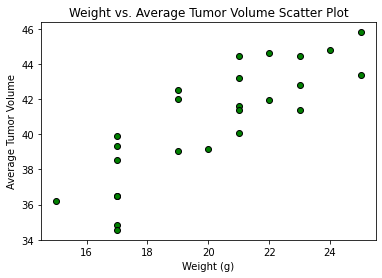

In [77]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average = capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()

weight = [22,21,17,19,22,24,20,23,21,21,19,17,19,25,17,25,17,23,17,17,21,23,21,15,17]
average_volume = [41.963636, 40.083699, 36.505973, 41.990097, 44.613344, 44.805810, 39.141053, 44.465236, 43.216925, 
                  44.434474, 42.507261, 34.847470, 39.049816, 45.798970, 36.509212, 43.367364, 34.559143,  42.803733,
                  39.328725, 39.887495, 41.581595, 41.384825, 41.352452, 36.182040, 38.506829] 

plt.scatter(weight, average_volume, marker="o", facecolors="green", edgecolors="black")
plt.title("Weight vs. Average Tumor Volume Scatter Plot")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")


#average = pd.DataFrame(average_tumor_volume)
#average = average.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
#average.head()
#average.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume")


## Correlation and Regression

The correlation between both factors is 0.84


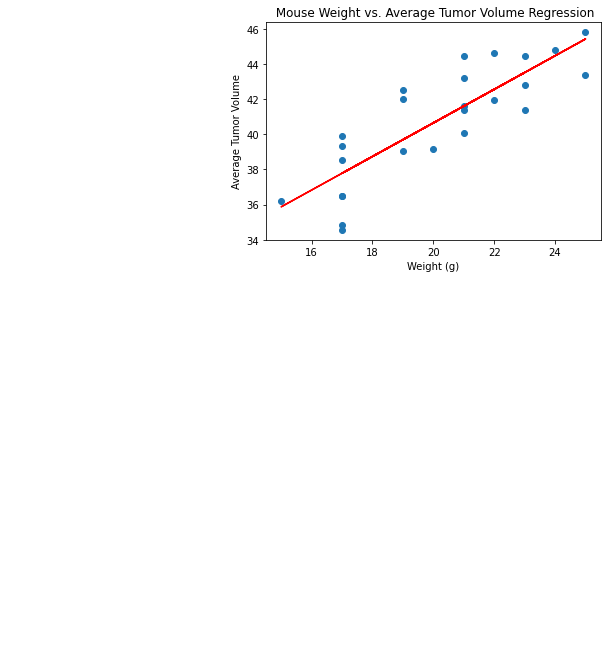

In [78]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


average = pd.DataFrame(capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average.head()
average = average.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
average

weight = average["Weight (g)"]
average_volume = average["Average Tumor Volume"]
correlation = st.pearsonr(weight,average_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


x_values = average['Weight (g)']
y_values = average['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title(" Mouse Weight vs. Average Tumor Volume Regression")
plt.show()
